<a href="https://colab.research.google.com/github/sjekic/ChihuahuaOrMuffin/blob/main/ChihuahuaOrMuffin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/muffin-vs-chihuahua-image-classification


In [27]:
filename = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/"

In [28]:
!pip install tensorflow
!pip install keras

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [30]:
import tensorflow as tf

train_dir = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/train"
test_dir = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test"

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(150, 150), batch_size=32, shuffle=True)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(150, 150), batch_size=32, shuffle=True)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


As there are subfolders inside of both the test and train folders tensorflow automatically turns them into classes inside of the newly made train and test datasets. As some images are potentially not the same size, they were resized to 150x150.

In [31]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [32]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [36]:
model1 = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model first performs data augmentation to the training dataset and afterwards the normalization.
In the first layer we specify the input shape (as previously mentioned we resized the images to 150x150) and as they are in color, the third dimension is 3 (each for the red, blue and green channel).
In the hidden layers we used the ReLU as it is the default choice and because it minimizes the risk of the vanishing gradient. The final layer uses the sigmoid function as we are here trying to perform binary classification.

In [37]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
history = model1.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.6123 - loss: 0.7431 - val_accuracy: 0.8041 - val_loss: 0.4524
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.8060 - loss: 0.4322 - val_accuracy: 0.8091 - val_loss: 0.4009
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8492 - loss: 0.3531 - val_accuracy: 0.8218 - val_loss: 0.4098
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8600 - loss: 0.3368 - val_accuracy: 0.8556 - val_loss: 0.3294
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8738 - loss: 0.2917 - val_accuracy: 0.8480 - val_loss: 0.3400
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8683 - loss: 0.3102 - val_accuracy: 0.7466 - val_loss: 0.5766
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8855 - loss: 0.2683 - val_accuracy: 0.8142 - val_loss: 0.4249
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8991 - loss: 0.2416 - val_accu

In [33]:
model2 = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
history = model2.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.6133 - loss: 0.6446 - val_accuracy: 0.7728 - val_loss: 0.4906
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8041 - loss: 0.4526 - val_accuracy: 0.8167 - val_loss: 0.3825
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8545 - loss: 0.3529 - val_accuracy: 0.7804 - val_loss: 0.4411
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.8616 - loss: 0.3303 - val_accuracy: 0.8682 - val_loss: 0.3297
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.8760 - loss: 0.3062 - val_accuracy: 0.8860 - val_loss: 0.2966
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8849 - loss: 0.2897 - val_accuracy: 0.8775 - val_loss: 0.2969
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8918 - loss: 0.2677 - val_accuracy: 0.8961 - val_loss: 0.2742
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8865 - loss: 0.2779 - val_accu

We tried out 2 models that differ in the number of layers. By adding another layer to the second model we noticed a decline in epoch 10 which could potentially indicate overfitting. Because the first model was fitting the data better

In [39]:
model1.save('model.h5')

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('model.h5')

img_path = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test/muffin/img_0_1037.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Prediction raw output: 0.9067736268043518
It's a Muffin!


In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('model.h5')

img_path = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test/chihuahua/img_0_842.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Prediction raw output: 0.0028262026607990265
It's a Chihuahua!


In [56]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                                include_top=False,
                                                weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<ipython-input-56-978c1e520a61>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [58]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=5
)


Epoch 1/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9812 - loss: 0.0406 - val_accuracy: 0.9865 - val_loss: 0.0432
Epoch 2/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 181s 899ms/step - accuracy: 0.9893 - loss: 0.0241 - val_accuracy: 0.9873 - val_loss: 0.0448
Epoch 3/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9908 - loss: 0.0252 - val_accuracy: 0.9882 - val_loss: 0.0492
Epoch 4/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9889 - loss: 0.0261 - val_accuracy: 0.9873 - val_loss: 0.0391
Epoch 5/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 182s 906ms/step - accuracy: 0.9929 - loss: 0.0235 - val_accuracy: 0.9856 - val_loss: 0.0492


In [59]:
model.save('modelMobileNetV2.h5')

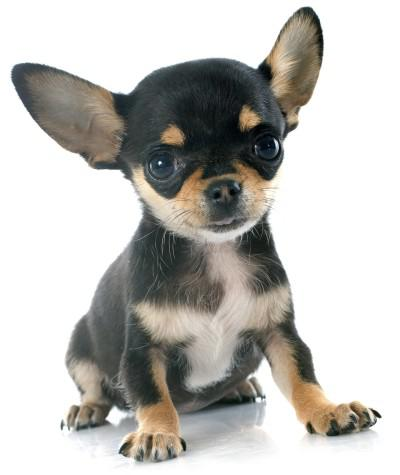

In [62]:
model = tf.keras.models.load_model('modelMobileNetV2.h5')

img_path = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test/chihuahua/img_0_1172.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction raw output: 2.3355987366358022e-08
It's a Chihuahua!


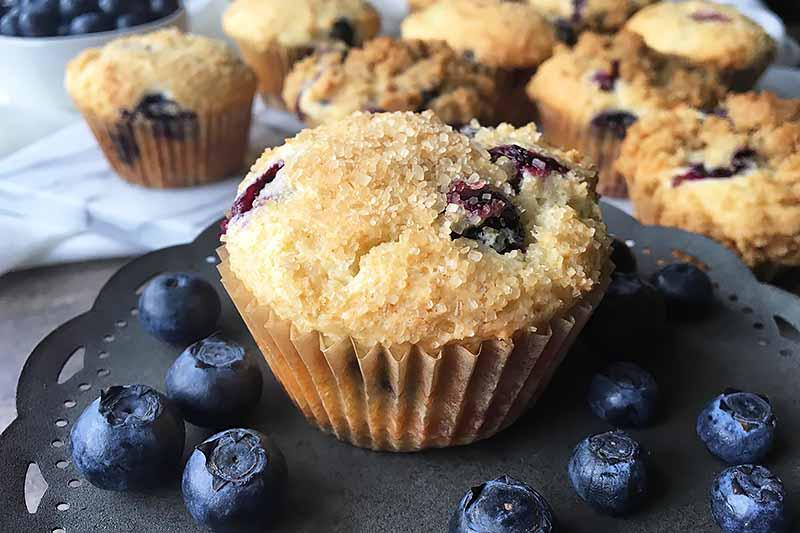

In [68]:
model = tf.keras.models.load_model('modelMobileNetV2.h5')

img_path = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test/muffin/img_4_997.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction raw output: 0.9999998807907104
It's a Muffin!


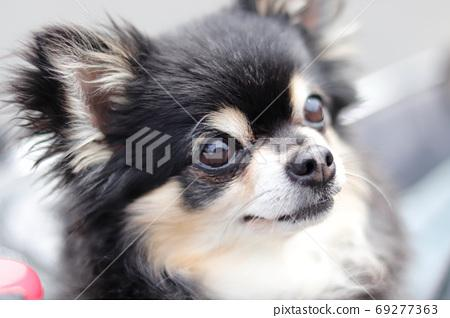

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('model.h5')

img_path = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2/test/chihuahua/img_0_842.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Prediction raw output: 0.0028262026607990265
It's a Chihuahua!
